In [11]:
import os
src_path = '/content/drive/MyDrive/Colab Notebooks/Kin_img_file/'
num = 0
for item in os.listdir(src_path):
  if item.endswith('.jpg'):
    num = num + 1
print(num)

444


In [ ]:
def read_dataset(dir_path):
    images, labels = list(),list()
    aim_dir = dir_path
    dir_name = deal_dir_str(dir_path)
    for dir_item in os.listdir(aim_dir):
        #os.listdir(目標資料夾)：可以列出目標資料夾裡面的所有檔案與資料夾
        #dir_item.endswith('.jpg')：可以檢查檔案名稱最末端是否包含有'.jpg'
        if dir_item.endswith('.jpg'):
            full_path = os.path.join(aim_dir,dir_item)
            abs_full_path = os.path.abspath(full_path)
            
            image = cv2.imread(abs_full_path)
            image = resize_image(image,Image_size,Image_size)
            images.append(image)
            labels.append(dir_name)
    print(labels)
    return images,labels

def deal_dir_str(dir_path):
  fixed_dir_path = dir_path[:len(dir_path)-1]
  pos = fixed_dir_path.rfind('/')
  head_pos = pos + 1
  tail_pos = len(fixed_dir_path)
  dir_name = fixed_dir_path[head_pos:tail_pos]
  return dir_name
  

In [ ]:
#3Data_Preprocessing.py

import os
import numpy as np
import cv2

Image_size = 64


def resize_image(image,height=Image_size,width=Image_size):
    top,bottom,left,right = 0,0,0,0
    h,w,tunnel = image.shape
    longest_edge = max(h,w)
    if (h<longest_edge):
        d = longest_edge - h
        top = d // 2 #"//"是取整除的商
        bottom = d // 2
    elif (w<longest_edge):
        d = longest_edge - w
        left = d//2
        right = d//2
    else:
        pass
    
    BLACK = [0,0,0]
    constant = cv2.copyMakeBorder(image,top,bottom,left,right,cv2.BORDER_CONSTANT,value=BLACK)
    return cv2.resize(constant,(height,width))


def read_dataset(dir_path):
    images, labels = list(),list()
    aim_dir = dir_path
    dir_name = deal_dir_str(dir_path)
    for dir_item in os.listdir(aim_dir):
        #os.listdir(目標資料夾)：可以列出目標資料夾裡面的所有檔案與資料夾
        #dir_item.endswith('.jpg')：可以檢查檔案名稱最末端是否包含有'.jpg'
        if dir_item.endswith('.jpg'):
            full_path = os.path.join(aim_dir,dir_item)
            abs_full_path = os.path.abspath(full_path)
            
            image = cv2.imread(abs_full_path)
            image = resize_image(image,Image_size,Image_size)
            images.append(image)
            labels.append(dir_name)
    print(labels)
    return images,labels

def deal_dir_str(dir_path):
  fixed_dir_path = dir_path[:len(dir_path)-1]
  pos = fixed_dir_path.rfind('/')
  head_pos = pos + 1
  tail_pos = len(fixed_dir_path)
  dir_name = fixed_dir_path[head_pos:tail_pos]
  return dir_name
####################################
def load_dataset(dir_name):
    images,labels = read_dataset(dir_name)
    #把images由list型態化為矩陣
    
    images = np.array(images)
    data_labels = list()
    print("(圖片檔案數量,長,寬,色彩通道)={}".format(images.shape))
    for label in labels:
        if label.endswith('FaceData_wong'):
            data_labels.append(1)
        else:
            data_labels.append(0)
    data_labels = np.array(data_labels)
    return images,data_labels
#####################################



#####################################
#######                 測試區                   ###### 
def data_list(dir_path):
    #把某個資料夾的圖片與標籤個別加入list，回傳此資料夾的圖片list與標籤list
    images,labels = read_dataset(dir_path)
    data_labels = list()
    for label in labels:
        if label.endswith('Trump_test'):
            data_labels.append(1)
        else:
            data_labels.append(0)
    return images,data_labels

def load_multi_dataset(dir_list):
    #把所有資料夾的圖片與標籤都加入list，之後再把All_imgs、All_labels轉成np.array，
    #回傳np.array型態的兩個陣列
    All_imgs= list()
    All_labels= list()
    for dir_path in dir_list:
        images,labels = data_list(dir_path)
        All_imgs = All_imgs + images
        All_labels = All_labels + labels
    All_imgs = np.array(All_imgs)
    All_labels = np.array(All_labels)

    return All_imgs,All_labels
#######                 測試區                   ###### 
######################################

In [ ]:
#4face_train.py

import random
import numpy as np
from six import string_types
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Activation , Flatten, Dropout
from keras.layers import Conv2D, MaxPool2D
#from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils
from keras.models import load_model
from keras import backend as K
import cv2

IMAGE_SIZE = 64

class Dataset:
    def __init__(self,path_name1,path_name2):
        #訓練集
        self.train_images = None
        self.train_labels = None
        #測試集
        self.test_images = None
        self.test_labels = None
        #資料路徑
        self.path_name1 = path_name1
        self.path_name2 = path_name2
        #self.path_name3 = path_name3
        #self.path_name4 = path_name4
        #self.path_name5 = path_name5
        self.dir_list = list()
        self.dir_list.append(self.path_name1)
        self.dir_list.append(self.path_name2)
        #self.dir_list.append(self.path_name3)
        #self.dir_list.append(self.path_name4)
        #self.dir_list.append(self.path_name5)
        #當前的資料維度順序
        self.input_shape = None

    '''
    def __init__(self,path_name):
        #訓練集
        self.train_images = None
        self.train_labels = None
        #測試集
        self.test_images = None
        self.test_labels = None
        #資料路徑
        self.path_name = path_name
        #當前的資料維度順序
        self.input_shape = None
    '''

    def load(self, img_rows = IMAGE_SIZE, img_cols = IMAGE_SIZE, img_channels = 3, nb_classes = 2):
        ###測試區
        images,labels = load_multi_dataset(self.dir_list)
        '''
        images, labels = load_dataset(self.path_name) #這是可用的
        '''
        train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size = 0.3, random_state = random.randint(0,10))

        #輸出訓練資料集、測試資料集的數量
        print(train_images.shape[0],'train samples')
        print(test_images.shape[0],'test samples')
        #使用categorical_crossentropy作為損失函數
        #class標籤進行one-hot編碼使其向量化，在此練習中標籤只有兩種
        train_labels = np_utils.to_categorical(train_labels, nb_classes)
        test_labels = np_utils.to_categorical(test_labels, nb_classes)
        #將圖片浮點化以便歸一化
        train_images = train_images.astype('float32')
        test_images = test_images.astype('float32')
        #開始歸一化，將圖像的各像素值
        train_images = train_images / 255.0
        test_images = test_images / 255.0
        self.input_shape = (img_rows,img_cols,img_channels)
        self.train_images = train_images
        self.test_images = test_images
        self.train_labels = train_labels
        self.test_labels = test_labels

class MODEL:
    def __init__(self):
        self.model = None
        self.history = object()
    def build_model(self,dataset,nb_classes = 2):
        self.model = Sequential()

        #以下是第一個code的
        self.model.add(Conv2D(32,kernel_size=(3,3),padding = "same", input_shape = (64,64,3),activation = "relu"))
        self.model.add(MaxPool2D(pool_size=(2,2)))
        self.model.add(Conv2D(32,kernel_size = (3,3),padding = "same",activation="relu"))
        self.model.add(MaxPool2D(pool_size = (2,2)))
        self.model.add(Dropout(0.25))
        self.model.add(Conv2D(64,3,3,padding="same",activation="relu"))
        self.model.add(MaxPool2D(pool_size=(2,2)))
        self.model.add(Dropout(0.25))
        self.model.add(Flatten())
        self.model.add(Dense(512,activation="relu"))
        self.model.add(Dropout(0.5))
        self.model.add(Dense(nb_classes,activation = "softmax"))

        #以下是第二個code的
        '''self.model.add(Conv2D(32,kernel_size=(3,3),padding = 'same',input_shape = dataset.input_shape,activation = "relu"))
        self.model.add(Conv2D(32,kernel_size=(3,3),activation = 'relu'))
        self.model.add(MaxPool2D(pool_size=(2,2)))
        self.model.add(Dropout(0.25))
        self.model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
        self.model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
        self.model.add(MaxPool2D(pool_size=(2,2)))
        self.model.add(Dropout(0.25))
        self.model.add(Flatten())
        self.model.add(Dense(512,activation='relu'))
        self.model.add(Dropout(0.5))
        self.model.add(Dense(nb_classes,activation='softmax'))'''
        self.model.summary()
    def train(self, dataset, batch_size = 20, epochs = 20, data_augmentation = False):
        sgd = SGD(learning_rate = 0.01, momentum = 0.9, nesterov = False, decay = 1e-6)
        self.model.compile(loss='categorical_crossentropy',optimizer = sgd, metrics = ['accuracy'])
        #######################可用block#############################
        '''self.history = self.model.fit(dataset.train_images, dataset.train_labels,
                        batch_size = batch_size, epochs = epochs, 
                        validation_data = (dataset.test_images, dataset.test_labels),
                        shuffle = True)'''
        ######################可用block###############################
        ########################測試 block#############################################
        if not data_augmentation:
          self.history = self.model.fit(dataset.train_images, dataset.train_labels,
                        batch_size = batch_size, epochs = epochs, 
                        validation_data = (dataset.test_images, dataset.test_labels),
                        shuffle = True)
        else:
          datagen = ImageDataGenerator(
                featurewise_center = False,             #是否使輸入資料去中心化（均值為0），
                samplewise_center  = False,             #是否使輸入資料的每個樣本均值為0
                featurewise_std_normalization = False,  #是否資料標準化（輸入資料除以資料集的標準差）
                samplewise_std_normalization  = False,  #是否將每個樣本資料除以自身的標準差
                zca_whitening = False,                  #是否對輸入資料施以ZCA白化
                rotation_range = 20,                    #資料提升時圖片隨機轉動的角度(範圍為0～180)
                width_shift_range  = 0.2,               #資料提升時圖片水平偏移的幅度（單位為圖片寬度的佔比，0~1之間的浮點數）
                height_shift_range = 0.2,               #同上，只不過這裡是垂直
                horizontal_flip = True,                 #是否進行隨機水平翻轉
                vertical_flip = False)                  #是否進行隨機垂直翻轉
          datagen.fit(dataset.train_images)

          self.history = self.model.fit_generator(datagen.flow(dataset.train_images,dataset.train_labels,batch_size = batch_size),
                        steps_per_epoch = None,
                        epochs = epochs,
                        validation_data = (dataset.test_images,dataset.test_labels))
        ########################測試 block##############################################
    MODEL_PATH = './face_model.h5'

    def save_model(self,file_path):
        self.model.save(file_path)
    
    def load_model(self,file_path = MODEL_PATH):
        self.model = load_model(file_path)
    
    def evaluate(self,dataset):
        score = self.model.evaluate(dataset.test_images, dataset.test_labels, verbose = 1)
        print(f'{self.model.metrics_names[1]}:{score[1] * 100}%')
    def face_predict(self,image):
        image = resize_image(image)
        image = image.reshape((1,IMAGE_SIZE,IMAGE_SIZE,3))
        image = image.astype('float32')
        image = image / 255.0
        
        #result = self.model.predict_classes(image)
        result = self.model.predict(image)
        result = np.argmax(result,axis =1)
        print('result:{}'.format(result))
        return result

if __name__ == '__main__':
    '''dataset = Dataset('Trump_test','Kin_face')
    dataset.load()
    print(dataset.train_images.shape)
    model = MODEL()
    model.build_model(dataset)
    model.train(dataset)
    model.evaluate(dataset)
    model.save_model(model.MODEL_PATH)'''
    
    '''model = MODEL()
    model.load_model()
    model.evaluate(dataset)'''

['Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trump_test', 'Trum

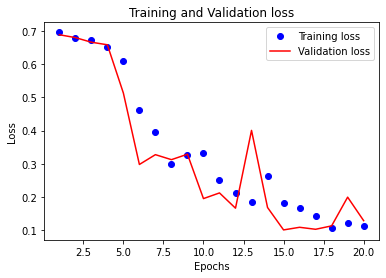

In [ ]:
#Analyze_model.py

import matplotlib.pyplot as plt
%matplotlib inline

dataset = Dataset('/content/drive/MyDrive/台科大/專題/project/Trump_test/','/content/drive/MyDrive/Colab Notebooks/Kin_img_file/')
dataset.load()
print(dataset.train_images.shape)
model = MODEL()
model.build_model(dataset)
model.train(dataset)
model.evaluate(dataset)
model.save_model('./face_model_0929.h5')
loss = model.history.history["loss"]
print(loss)
epochs = range(1,len(loss)+1)
val_loss = model.history.history["val_loss"]
plt.plot(epochs,loss,"bo",label="Training loss")
plt.plot(epochs,val_loss,"r",label="Validation loss")
plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



In [ ]:
#讓模型去辨識圖片

import random
import numpy as np
from six import string_types
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Activation , Flatten, Dropout
from keras.layers import Conv2D, MaxPool2D
#from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils
from keras.models import load_model
from keras import backend as K
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

def show_img(img):
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.axis('off')

def dir_predict(dir_path):
    model = MODEL()
    model.load_model('only_face_trump.h5')

    '''faker = cv2.imread('FaceData_wong/0.jpg')
    result = model.face_predict(faker)
    print(result)'''


    num = 0
    correct = 0
    aim_dir = dir_path
    for dir_item in os.listdir(aim_dir):
        if(dir_item.endswith('.jpg') or dir_item.endswith('.Jpg')):
          faker = cv2.imread(aim_dir + dir_item)
          num = num + 1
          result = model.face_predict(faker)
          if (result == 0):
            correct = correct + 1
          else:
            pass
    print('總共{}張'.format(num))
    print('正確{}張'.format(correct))


if __name__ == '__main__':
    #dir_predict('/content/drive/MyDrive/Colab Notebooks/Kin_img/Kin_img_face_augmentation/')
    model = MODEL()
    model.load_model('/content/face_model_0929.h5')
    faker = cv2.imread('/content/Kin.jpg')
    result = model.face_predict(faker)
    print(result)
    show_img(faker)

result:[0]
result:[0]
result:[1]
result:[0]
result:[0]
result:[0]
result:[1]
result:[1]
result:[0]
result:[1]
result:[0]
result:[0]
result:[0]
result:[0]
result:[0]
result:[0]
result:[0]
result:[1]
result:[1]
result:[0]
result:[1]
result:[1]
result:[1]
result:[1]
result:[1]
result:[1]
result:[1]
result:[1]
result:[1]
result:[1]
result:[1]
result:[1]
result:[0]
result:[0]
result:[0]
result:[0]
result:[0]
result:[0]
result:[0]
result:[0]
result:[0]
result:[0]
result:[0]
result:[0]
result:[0]
result:[0]
result:[0]
result:[0]
result:[0]
result:[0]
result:[0]
result:[0]
result:[0]
result:[0]
result:[0]
result:[0]
result:[1]
result:[0]
result:[1]
result:[1]
result:[0]
result:[0]
result:[0]
result:[0]
result:[0]
result:[0]
result:[0]
result:[0]
result:[0]
result:[0]
result:[0]
result:[0]
result:[0]
result:[0]
result:[0]
result:[0]
result:[0]
result:[1]
result:[0]
result:[1]
result:[0]
result:[0]
result:[0]
result:[0]
result:[0]
result:[0]
result:[0]
result:[0]
result:[0]
result:[0]
result:[0]